# Учебный проект на тему "Реализация подхода one-vs-all в многоклассовой классификации"

**Целью** выполнения данного учебного проекта является **самостоятельная программная реализация подхода one-vs-all для решения задачи многоклассовой классификации**

**Содержание учебного проекта**
* 1. Теоретическая часть
* 2. Импорт небходимых библиотек
* 3. Загрузка данных
* 4. Визуализация данных
* 5. Реализация класса One_vs_all
* 6. Сравнение метрик нашей модели и модели из sklearn
* 7. Подсчет оставшихся метрик

# 1. Теоретическая часть

*Подход One-vs-All*

Обучается N бинарных классификаторов, где N - количестве классов и N > 2, таким образом, что каждый из них учится определять только один вид класса от всех остальных. После чего входной объект оценивается каждым из классификаторов и принимается решение об отнесении объекта к одному из N классов, исходя из того, какой классификатор показал большую степень уверенности в том, что объект относится именно к его классу.


Classifier 1: Green vs. [Blue, Red]<br>
Classifier 2: Red vs. [Blue, Green]<br>
Classifier 3: Blue vs. [Red, Greed]

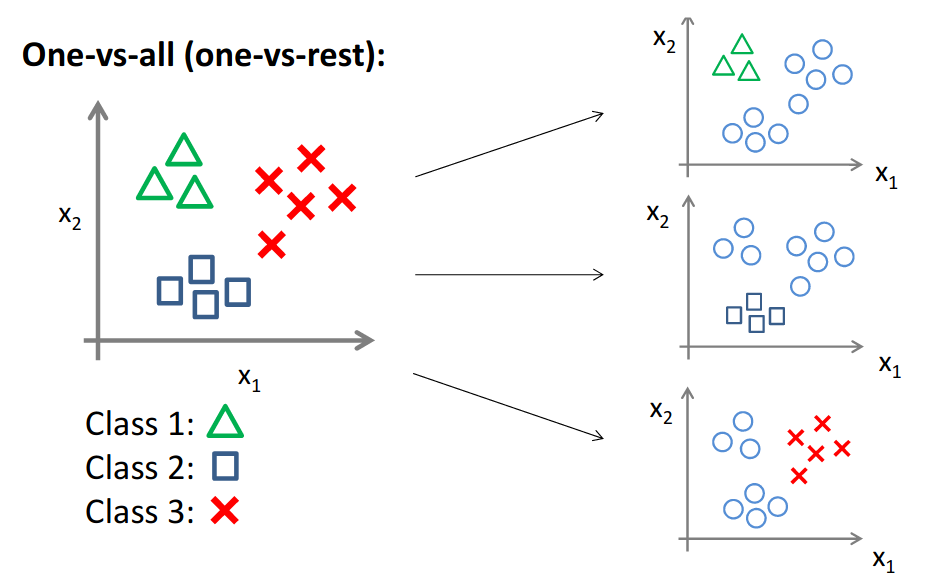

# 2. Импорт необходимых библиотек

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, roc_curve, precision_recall_curve, auc

# 3. Загрузка данных

In [5]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1)

In [6]:
# Разбиение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 4. Визуализация данных

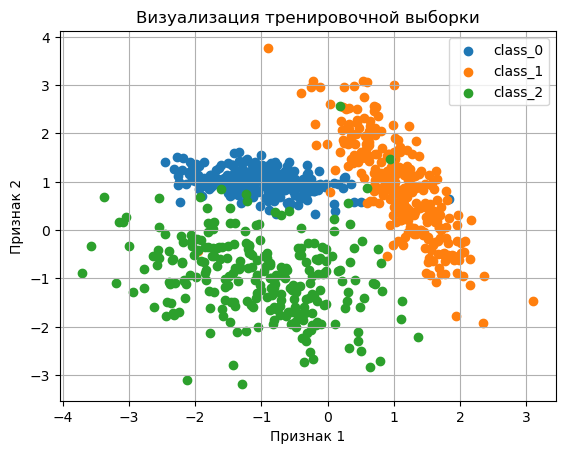

In [10]:
X_train_0 = np.array([X_train[i] for i in range(len(y_train)) if y_train[i] == 0])
X_train_1 = np.array([X_train[i] for i in range(len(y_train)) if y_train[i] == 1])
X_train_2 = np.array([X_train[i] for i in range(len(y_train)) if y_train[i] == 2])
plt.scatter(X_train_0[:, 0], X_train_0[:, 1])
plt.scatter(X_train_1[:, 0], X_train_1[:, 1])
plt.scatter(X_train_2[:, 0], X_train_2[:, 1])
plt.legend(['class_0', 'class_1', 'class_2'])
plt.title('Визуализация тренировочной выборки')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid()
plt.show()

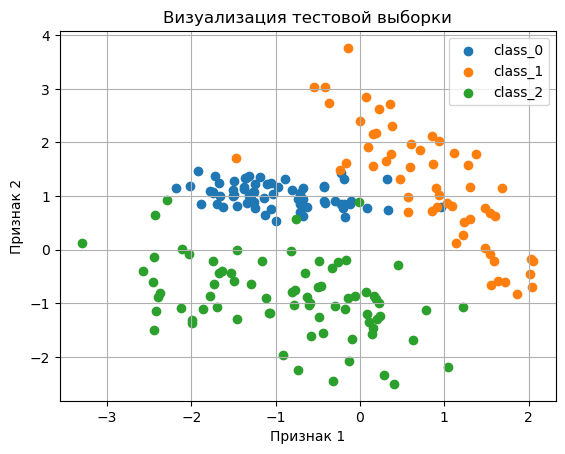

In [11]:
X_test_0 = np.array([X_test[i] for i in range(len(y_test)) if y_test[i] == 0])
X_test_1 = np.array([X_test[i] for i in range(len(y_test)) if y_test[i] == 1])
X_test_2 = np.array([X_test[i] for i in range(len(y_test)) if y_test[i] == 2])
plt.scatter(X_test_0[:, 0], X_test_0[:, 1])
plt.scatter(X_test_1[:, 0], X_test_1[:, 1])
plt.scatter(X_test_2[:, 0], X_test_2[:, 1])
plt.legend(['class_0', 'class_1', 'class_2'])
plt.title('Визуализация тестовой выборки')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid()
plt.show()

# 5. Реализация класса One_vs_all

В качестве бинарного классификатора будем использовать **модель логистической регрессии**

In [12]:
class One_vs_all():
    def __init__(self, n): # n - количество классов
        clfs = []
        for _ in range(n):
            clfs.append(LogisticRegression())
        self.clfs = clfs
    
    def fit(self, X_train, y_train):
        for i in range(len(self.clfs)):
            y_train_current = []
            for j in y_train:
                if j == i:
                    y_train_current.append(1)
                else:
                    y_train_current.append(0)
            self.clfs[i].fit(X_train, y_train_current)
    
    def predict(self, X_test):
        y_pred = []
        for i in range(X_test.shape[0]):
            probs = []
            for j in range(len(self.clfs)):
                probs.append(self.clfs[j].predict_proba(X_test)[i, 1])
            maxx = 0
            index_max = 0
            for j in range(len(probs)):
                if probs[j] > maxx:
                    maxx = probs[j]
                    index_max = j
            y_pred.append(index_max)
        return np.array(y_pred)

Теперь обучим нашу созданную модель One_vs_all и посчитаем метрику accuracy

In [13]:
ova = One_vs_all(3)
ova.fit(X_train, y_train)
y_pred_train = ova.predict(X_train)
y_pred_test = ova.predict(X_test)
print(f'accuracy on train = {acc(y_train, y_pred_train)}')
print(f'accuracy on test = {acc(y_test, y_pred_test)}')

accuracy on train = 0.95125
accuracy on test = 0.93


# 6. Сравнение метрик нашей модели и модели из sklearn

Создадим и обучим модель логистической регрессии из sklearn

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
print(f'accuracy on train = {acc(y_train, y_pred_train)}')
print(f'accuracy on test = {acc(y_test, y_pred_test)}')

accuracy on train = 0.95875
accuracy on test = 0.935


Видим, что метрики практически совпадают. Следовательно, собственная реализация подхода one-vs-all прошла **успешно**!

# 7. Подсчёт оставшихся метрик

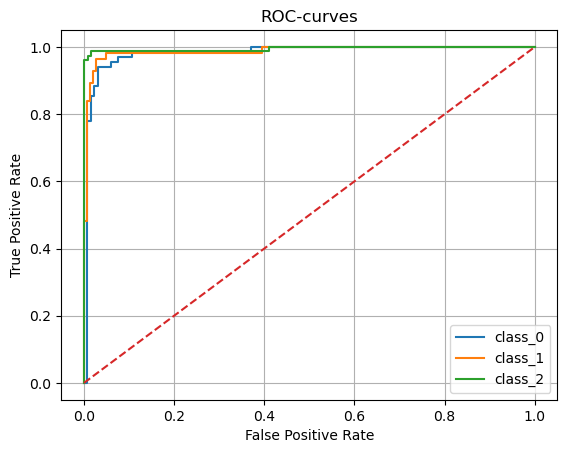

In [24]:
# Строим ROC-кривую на тестовой выборке для класса 0
y_test_0 = []
for i in range(len(y_test)):
    if y_test[i] == 0:
        y_test_0.append(1)
    else:
        y_test_0.append(0)
fpr_0, tpr_0, thresholds_0 = roc_curve(y_test_0, logreg.predict_proba(X_test)[:, 0])

# Строим ROC-кривую на тестовой выборке для класса 1
y_test_1 = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        y_test_1.append(1)
    else:
        y_test_1.append(0)
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test_1, logreg.predict_proba(X_test)[:, 1])

# Строим ROC-кривую на тестовой выборке для класса 2
y_test_2 = []
for i in range(len(y_test)):
    if y_test[i] == 2:
        y_test_2.append(1)
    else:
        y_test_2.append(0)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test_2, logreg.predict_proba(X_test)[:, 2])

plt.plot(fpr_0, tpr_0)
plt.plot(fpr_1, tpr_1)
plt.plot(fpr_2, tpr_2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC-curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['class_0', 'class_1', 'class_2'])
plt.grid()
plt.show()

In [34]:
print(f'Для класса 0 auc = {auc(fpr_0, tpr_0)}')
print(f'Для класса 1 auc = {auc(fpr_1, tpr_1)}')
print(f'Для класса 2 auc = {auc(fpr_2, tpr_2)}')

Для класса 0 auc = 0.98150623885918
Для класса 1 auc = 0.9871031746031746
Для класса 2 auc = 0.9942699490662139


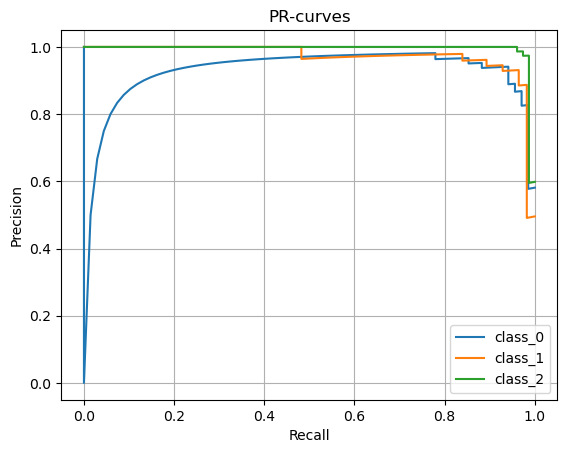

In [28]:
# Строим PR-кривую на тестовой выборке для класса 0
y_test_0 = []
for i in range(len(y_test)):
    if y_test[i] == 0:
        y_test_0.append(1)
    else:
        y_test_0.append(0)
pr_0, rc_0, thresholds_0 = precision_recall_curve(y_test_0, logreg.predict_proba(X_test)[:, 0])

# Строим PR-кривую на тестовой выборке для класса 1
y_test_1 = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        y_test_1.append(1)
    else:
        y_test_1.append(0)
pr_1, rc_1, thresholds_1 = precision_recall_curve(y_test_1, logreg.predict_proba(X_test)[:, 1])

# Строим PR-кривую на тестовой выборке для класса 2
y_test_2 = []
for i in range(len(y_test)):
    if y_test[i] == 2:
        y_test_2.append(1)
    else:
        y_test_2.append(0)
pr_2, rc_2, thresholds_2 = precision_recall_curve(y_test_2, logreg.predict_proba(X_test)[:, 2])

plt.plot(rc_0, pr_0)
plt.plot(rc_1, pr_1)
plt.plot(rc_2, pr_2)
plt.title('PR-curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['class_0', 'class_1', 'class_2'])
plt.grid()
plt.show()

In [35]:
print(f'Для класса 0 auc = {auc(rc_0, pr_0)}')
print(f'Для класса 1 auc = {auc(rc_1, pr_1)}')
print(f'Для класса 2 auc = {auc(rc_2, pr_2)}')

Для класса 0 auc = 0.9203407084198298
Для класса 1 auc = 0.9726798353430467
Для класса 2 auc = 0.9941745173012762
